**Problem Statment**
<h1></h1>
Unicorn Investor are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, we need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

Evaluation Metric: RMSE


1) Hypothesis Generation
Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

***There will be an increase in the traffic as the years pass by.***
Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.
***The traffic will be high from May to October.***
Explanation - Tourist visits generally increases during this time perion.
***Traffic on weekdays will be more as compared to weekends/holidays.***
Explanation - People will go to office on weekdays and hence the traffic will be more
***Traffic during the peak hours will be high.***
Explanation - People will travel to work, college.

In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import os

In [2]:
os.chdir(r"H:\Desktop\Learning_Personal\AV\Time Series analysis for Jet Prop")

In [3]:
os.getcwd()

'H:\\Desktop\\Learning_Personal\\AV\\Time Series analysis for Jet Prop'

In [4]:
train = pd.read_csv("Train_AV_Jet.csv")
test = pd.read_csv("Test_AV_Jet.csv")

In [5]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [7]:
train_original=train.copy()
test_original=test.copy()

In [8]:
train.describe()

,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [9]:
train_original=train.copy()
test_original=test.copy()

In [10]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [11]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [12]:
train.dtypes , test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

***4) Feature Extraction***

In [13]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [14]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

**
We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend.

**

In [15]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2= train['Datetime'].apply(applyer)
train['weekday'] = temp2


***

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

We will work on the train file for all the analysis and will use the test file for forecasting.

***

Text(0.5,1,'Time Series')

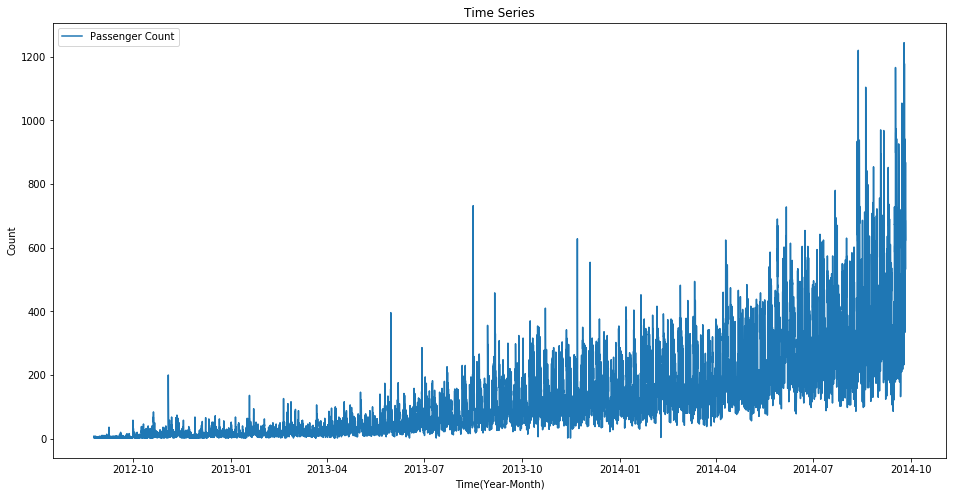

In [16]:
train.index= train['Datetime']  ## index the series as X axix
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts , label='Passenger Count')
plt.xlabel("Time(Year-Month)")
plt.ylabel("Count")
plt.legend(loc="best")
plt.title("Time Series")


Lets recall the hypothesis that we made earlier:

Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high
After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

5) Exploratory Analysis
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

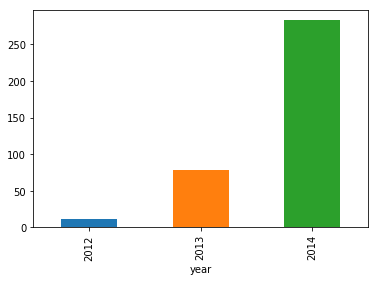

In [17]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

train.groupby('year')['Count'].mean().plot.bar()

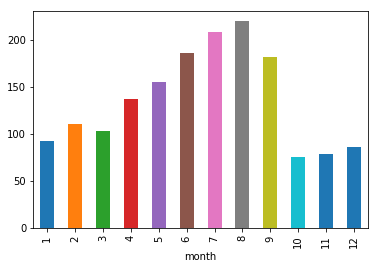

In [18]:
train.groupby('month')['Count'].mean().plot.bar()

***Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately. ***

In [19]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp
##temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)



year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let's look at the daily mean of customers


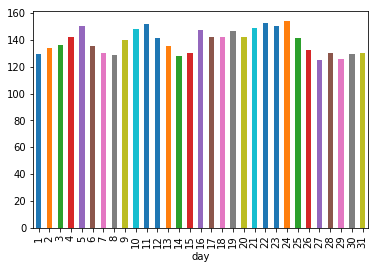

In [20]:
train.groupby('day')['Count'].mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

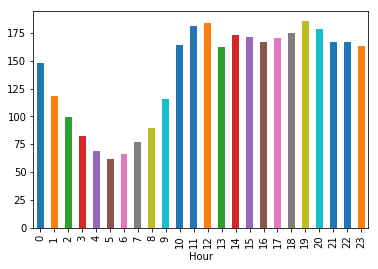

In [21]:
train.groupby('Hour')['Count'].mean().plot.bar()

  
    It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.
Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

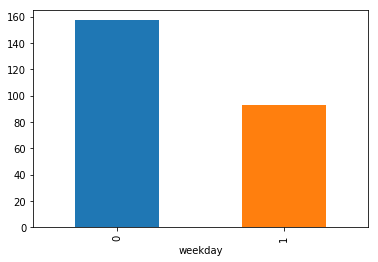

In [23]:
train.groupby('weekday')['Count'].mean().plot.bar()

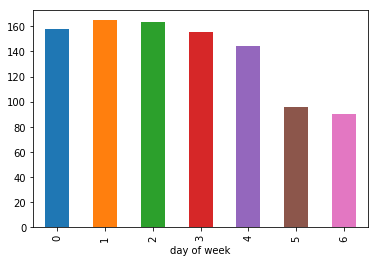

In [24]:
train.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [25]:
## Delete the ID from train

train=train.drop('ID',1)

In [26]:
train.Timestamp = pd.to_datetime(train.Datetime , format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

## Hourly time series
hourly = train.resample('H').mean()

## converting to daily 

daily = train.resample('D').mean()

## converting to weekly 
weekly = train.resample('W').mean()

## converting to monthly

monthly = train.resample('m').mean()

hourly

,Count,day of week,weekday,year,month,day,Hour
Datetime,,,,,,,
2012-08-25 00:00:00,8,5,1,2012,8,25,0
2012-08-25 01:00:00,2,5,1,2012,8,25,1
2012-08-25 02:00:00,6,5,1,2012,8,25,2
2012-08-25 03:00:00,2,5,1,2012,8,25,3
2012-08-25 04:00:00,2,5,1,2012,8,25,4
2012-08-25 05:00:00,2,5,1,2012,8,25,5
2012-08-25 06:00:00,2,5,1,2012,8,25,6
2012-08-25 07:00:00,2,5,1,2012,8,25,7
2012-08-25 08:00:00,6,5,1,2012,8,25,8


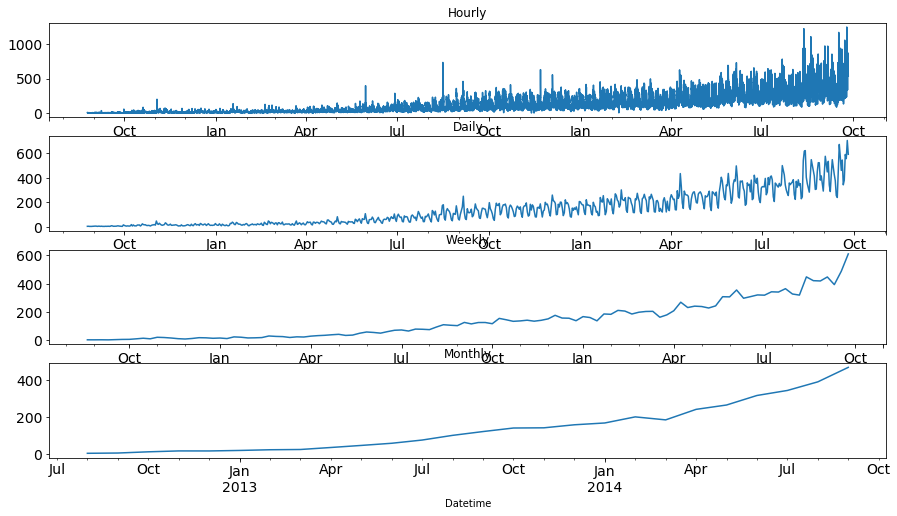

In [30]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()


We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [31]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

As we have validated all our hypothesis, let’s go ahead and build models for Time Series Forecasting. But before we do that, we will need a dataset(validation) to check the performance and generalisation ability of our model. Below are some of the properties of the dataset required for the purpose.

The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.

The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.

So, for the above two reasons, we generally divide the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset. Now there are multiple ways to divide the train dataset such as Random Division etc

NOTE - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [33]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.

Now we will look at how the train and validation part has been divided.

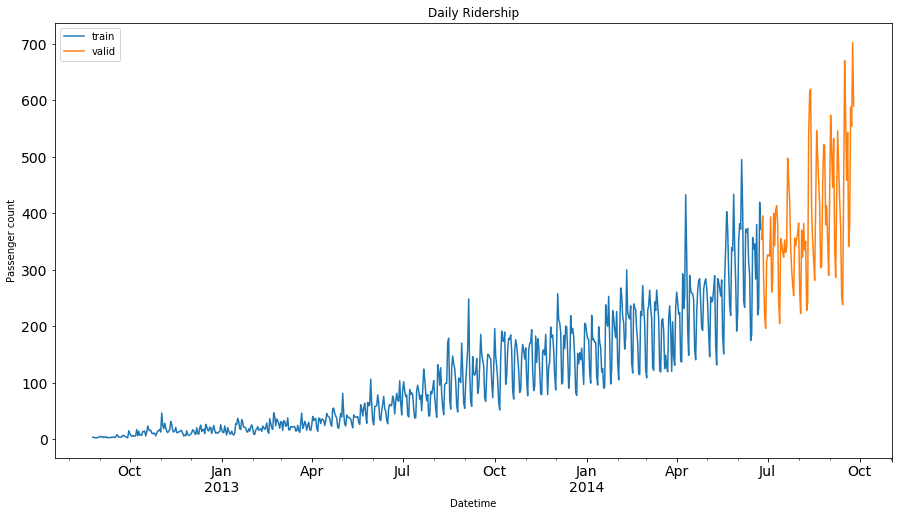

In [34]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

i) Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

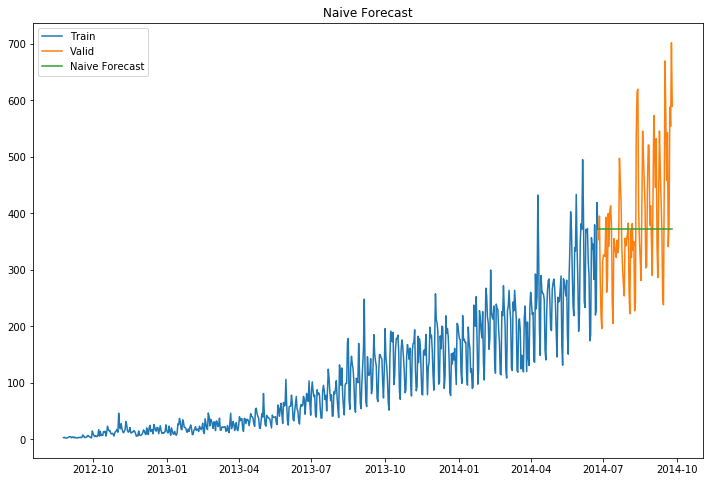

In [36]:
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
    - rmse is the standard deviation of the residuals.
    - Residuals are a measure of how far from the regression line data points are.
    - The formula for rmse is:

We will now calculate RMSE to check the accuracy of our model on validation data set.

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


** ii) Moving Average**


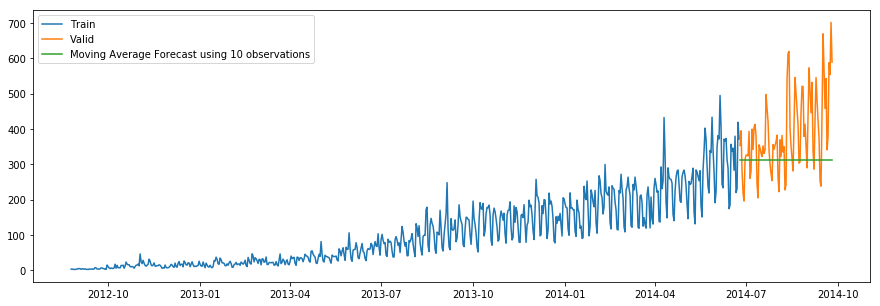

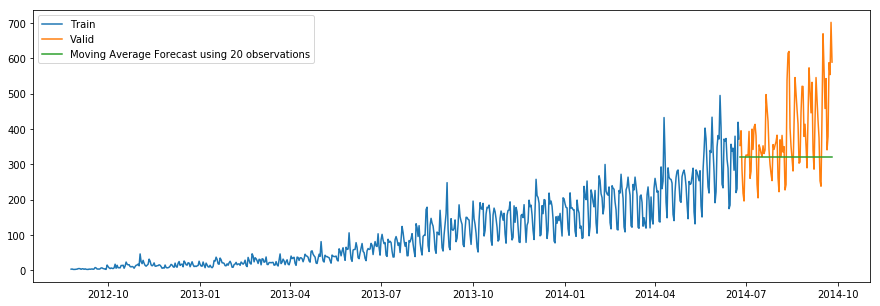

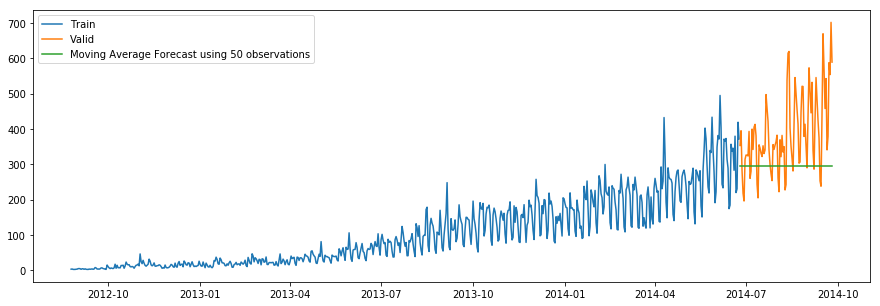

In [39]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

***iii) Simple Exponential Smoothing ***
In this technique, we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.
NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.



In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing , Holt
y_hat_avg = valid.copy()
fit2 = ExponentialSmoothing(np.asarray(Train['Count'].fit(smoothing_level=0.6,optimized=False)))